# Design a Sine/Cosine filter

Filter for short-offsets, high resistivities; based on the Fourier-filter wer_201_2018, developed for

> Werthmüller, D., K. Key, and E. Slob, 2019, A tool for designing digital filters for the Hankel and Fourier transforms in potential, diffusive, and wavefield modeling: Geophysics, 84(2), F47-F56; DOI: 10.1190/geo2018-0069.1.

see https://github.com/emsig/article-fdesign

In [1]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [3]:
n = 101
inp = {'r': np.logspace(0, 10, 1000),
       'r_def': (1, 1, 2),
       'n': n,
       'name': f"wer_{n}_CosSin_2020a",
       'full_output': True,
       'fI': (empymod.fdesign.sin_1(), empymod.fdesign.cos_1())}

## 1. Rough overview over a wide range

   brute fct calls : 99/100
   Filter length   : 101
   Best filter
   > Min field     : 3.44653e-09
   > Spacing       : 0.1
   > Shift         : -0.7777777778
   > Base min/max  : 3.095587e-03 / 6.818484e+01

:: empymod END; runtime = 0:00:01.771733 :: 

* QC: Overview of brute-force inversion:


/home/dtr/anaconda3/lib/python3.8/site-packages/empymod/scripts/fdesign.py:646: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(shift, spacing, field, cmap=cmap)


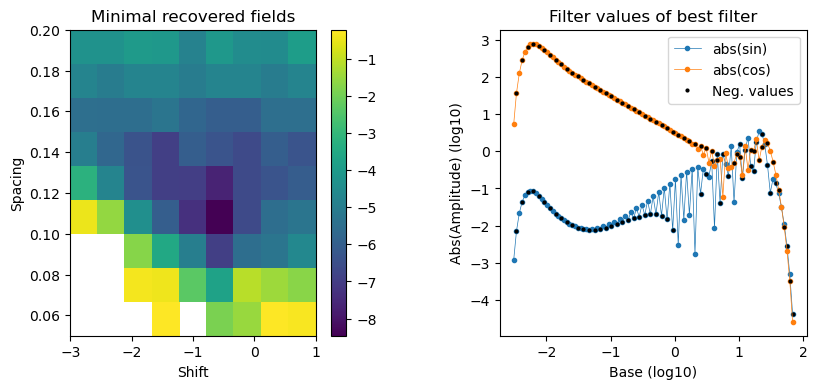

In [4]:
filt1, out1 = empymod.fdesign.design(spacing=(0.05, 0.2, 10), shift=(-3, 1, 10), save=False, **inp)

## 2. First focus

   brute fct calls : 99/100
   Filter length   : 101
   Best filter
   > Min field     : 8.54816e-09
   > Spacing       : 0.1066666667
   > Shift         : -0.8888888889
   > Base min/max  : 1.984830e-03 / 8.515256e+01

:: empymod END; runtime = 0:00:02.741973 :: 

* QC: Overview of brute-force inversion:


/home/dtr/anaconda3/lib/python3.8/site-packages/empymod/scripts/fdesign.py:646: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(shift, spacing, field, cmap=cmap)


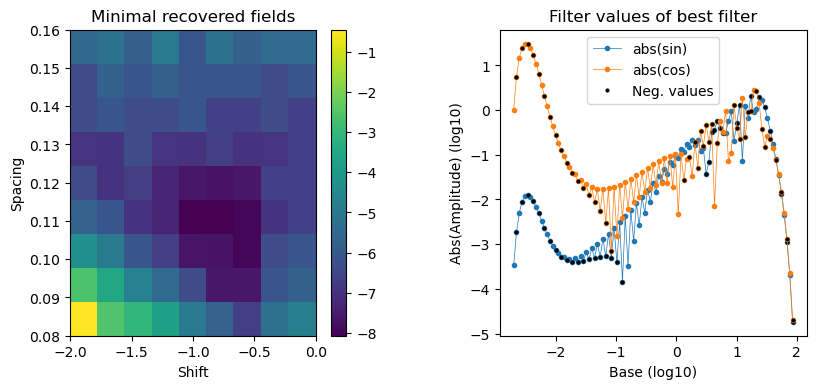

In [5]:
filt2, out2 = empymod.fdesign.design(spacing=(0.08, 0.16, 10), shift=(-2, 0, 10), save=False, **inp)

## 3. Final focus

   brute fct calls : 100    
   fmin  fct calls : 158

   Filter length   : 101
   Best filter
   > Min field     : 3.43371e-09
   > Spacing       : 0.1108834603
   > Shift         : -0.8501278841
   > Base min/max  : 1.671054e-03 / 1.092944e+02

:: empymod END; runtime = 0:00:03.885937 :: 

* QC: Overview of brute-force inversion:


/home/dtr/anaconda3/lib/python3.8/site-packages/empymod/scripts/fdesign.py:646: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(shift, spacing, field, cmap=cmap)


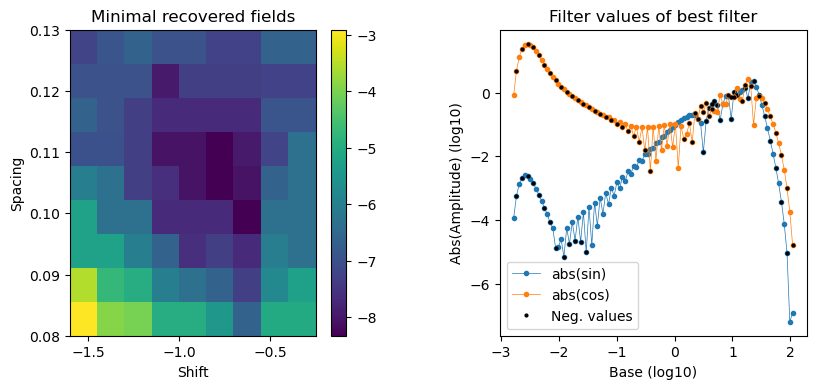

In [6]:
filt, out = empymod.fdesign.design(spacing=(0.08, 0.13, 10), shift=(-1.6, -0.25, 10), finish=True, save=True, **inp)


:: empymod END; runtime = 0:00:00.069402 :: 1 kernel call(s)


:: empymod END; runtime = 0:00:00.025246 :: 1 kernel call(s)


:: empymod END; runtime = 0:00:00.012725 :: 1 kernel call(s)



<ipython-input-7-fd7a2ab5651b>:33: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('symlog', linthreshy=1e-16, linscaley = 0.01)
<ipython-input-7-fd7a2ab5651b>:33: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('symlog', linthreshy=1e-16, linscaley = 0.01)


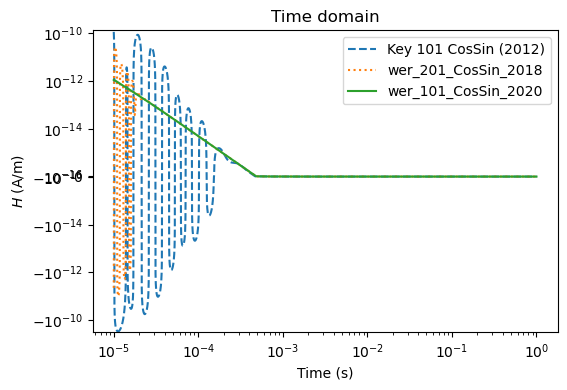

In [7]:
# Load filter wer_201_CosSin_2018
wer201_18 = empymod.filters.DigitalFilter('wer_201_CosSin_2018')
wer201_18.fromfile('./filters/')

# Use filter key_101_CosSin_2012 instead
key101_12 = empymod.filters.key_101_CosSin_2012()


times = np.logspace(-5, 0, 5000)  

modinp = {'src': [0, 0, 0, 0, 90],
       'rec': [10, 0, 0, 0, 90],
       'depth': [0],
       'epermH': [0, 1],
       'freqtime': times,
       'mrec': 'loop',
       'signal': -1,
      }

plt.figure()
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel(r'$H$ (A/m)')

ls = ['--', ':', '-']
for i, ftfilt in enumerate([key101_12, wer201_18, filt]):
    rx3H = empymod.loop(res=[2e14, 100000], ftarg={'dlf': ftfilt}, **modinp)


    plt.plot(times, -rx3H, ls[i], label=ftfilt.name)

plt.xscale('log')
plt.yscale('symlog', linthreshy=1e-16, linscaley = 0.01)
plt.legend()
plt.show()

In [8]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Wed Aug 19 10:50:16 2020 CEST

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15)
  [GCC 7.5.0]

             numpy : 1.19.1
             scipy : 1.5.2
             numba : 0.50.1
           empymod : 2.0.2
           IPython : 7.16.1
        matplotlib : 3.3.0

  Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------